In [1]:
!pip install scikit-learn
!pip install yfinance 

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
future_dates_to_be_predicted = 252

In [4]:
import yfinance as yf

In [5]:
ticker = 'TSLA'
data = yf.download(ticker, start="2007-01-01", end = "2018-09-17")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


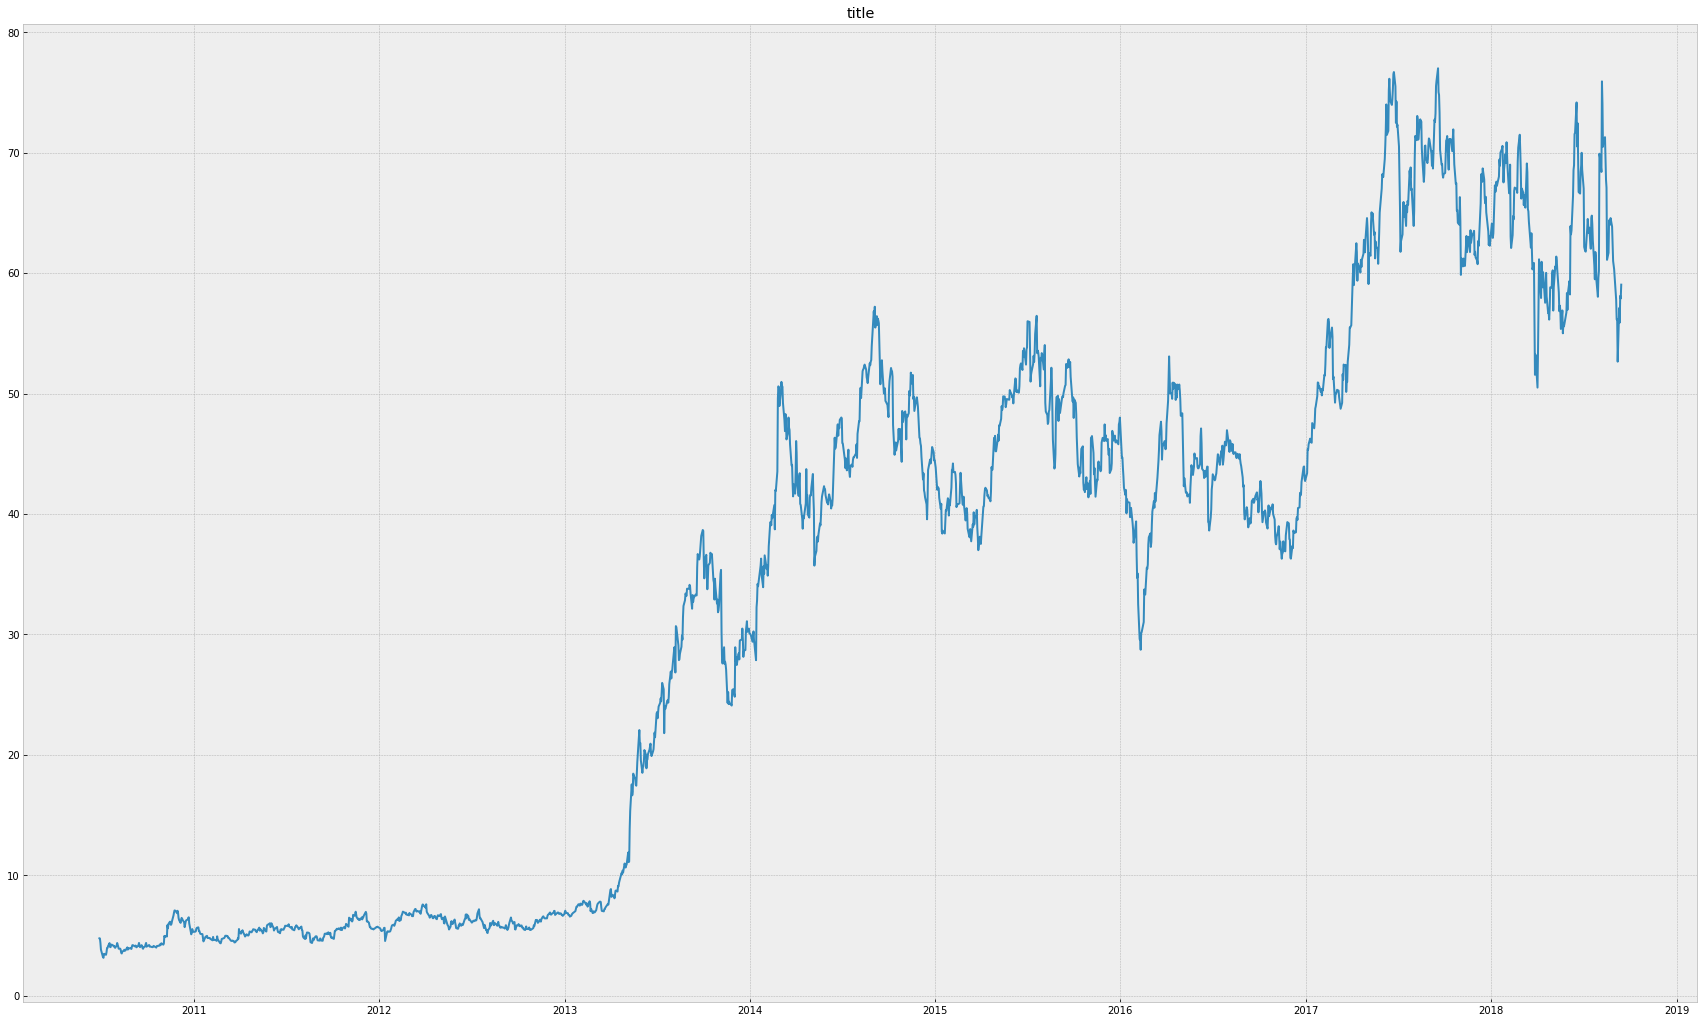

In [6]:
plt.figure(figsize=(30,18))
plt.title('title')
plt.plot(data['Adj Close'])
plt.show()

In [7]:
df = data[['Adj Close']].reset_index()
#df.head()

In [8]:
df = df[['Adj Close']]
#df.head(2)

In [9]:
future_days = future_dates_to_be_predicted
df['Prediction'] = df[['Adj Close']].shift(-future_days)
#df.head(4)

In [10]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
#print(X)


In [11]:
y = np.array(df['Prediction'])[:-future_days]
#print(y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [13]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [14]:
xfuture = df.drop(["Prediction"], 1)[:-future_days]
xfuture = xfuture.tail(future_days)
xfuture = np.array(xfuture)
#print(xfuture)

In [15]:
tree_prediction = tree.predict(xfuture)
#tree_prediction
#print()

lr_prediction = lr.predict(xfuture)
#print(lr_prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


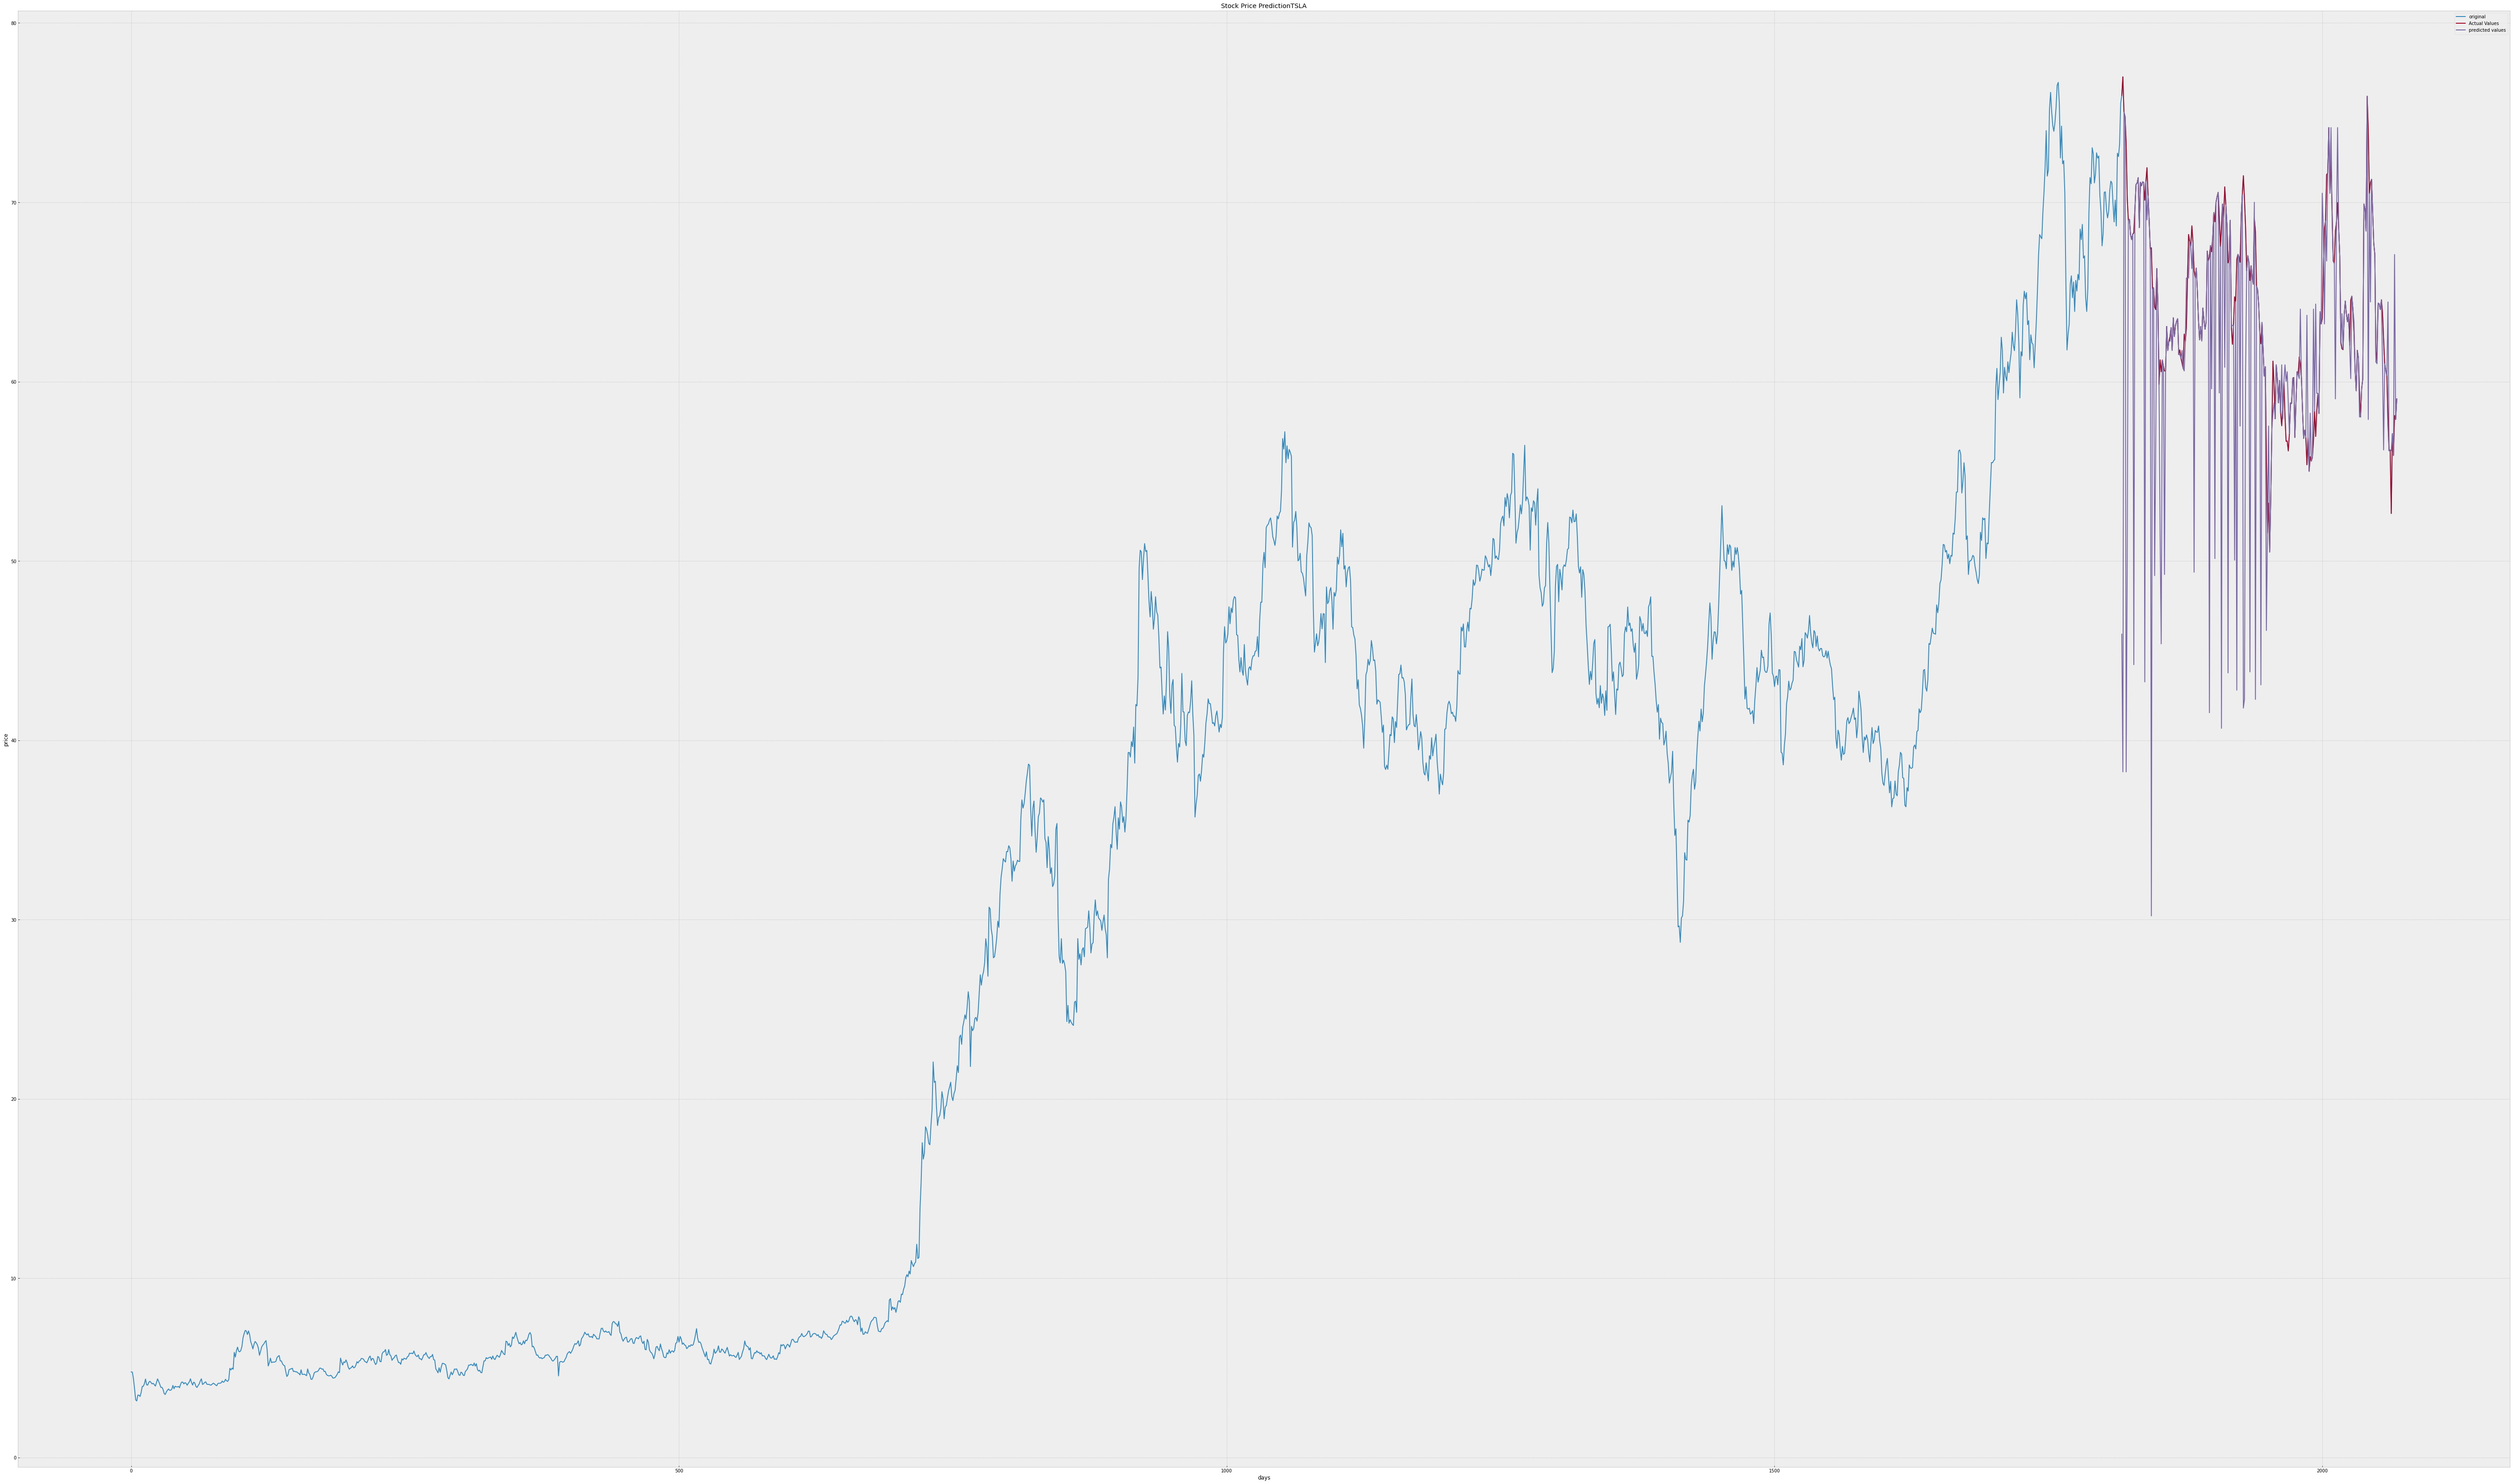

In [16]:
predictions = tree_prediction

valid = df[X.shape[0]:]

valid['Predictions'] = predictions

plt.figure(figsize=(100,60))
plt.title('Stock Price Prediction'+ticker+'')
plt.xlabel('days')
plt.ylabel('price')

plt.plot(df['Adj Close'])
#plt.plot(valid[['Adj Close','Predicitions']])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['original','Actual Values', 'predicted values'])
plt.show()

In [17]:
prediction_values = pd.DataFrame(valid['Predictions'])

In [21]:
ticker = ticker
data1= yf.download(ticker, start="2018-09-18")['Adj Close']

data1.reset_index(drop=True, inplace=True)
data1 = pd.DataFrame(data1)
#data1.head(10)

[*********************100%***********************]  1 of 1 completed


In [23]:
prediction_values.reset_index(drop=True, inplace=True)
prediction_values = pd.DataFrame(prediction_values)
prediction_values.head(5)

,Predictions
0,45.917999
1,38.240002
2,75.019997
3,74.781998
4,38.240002


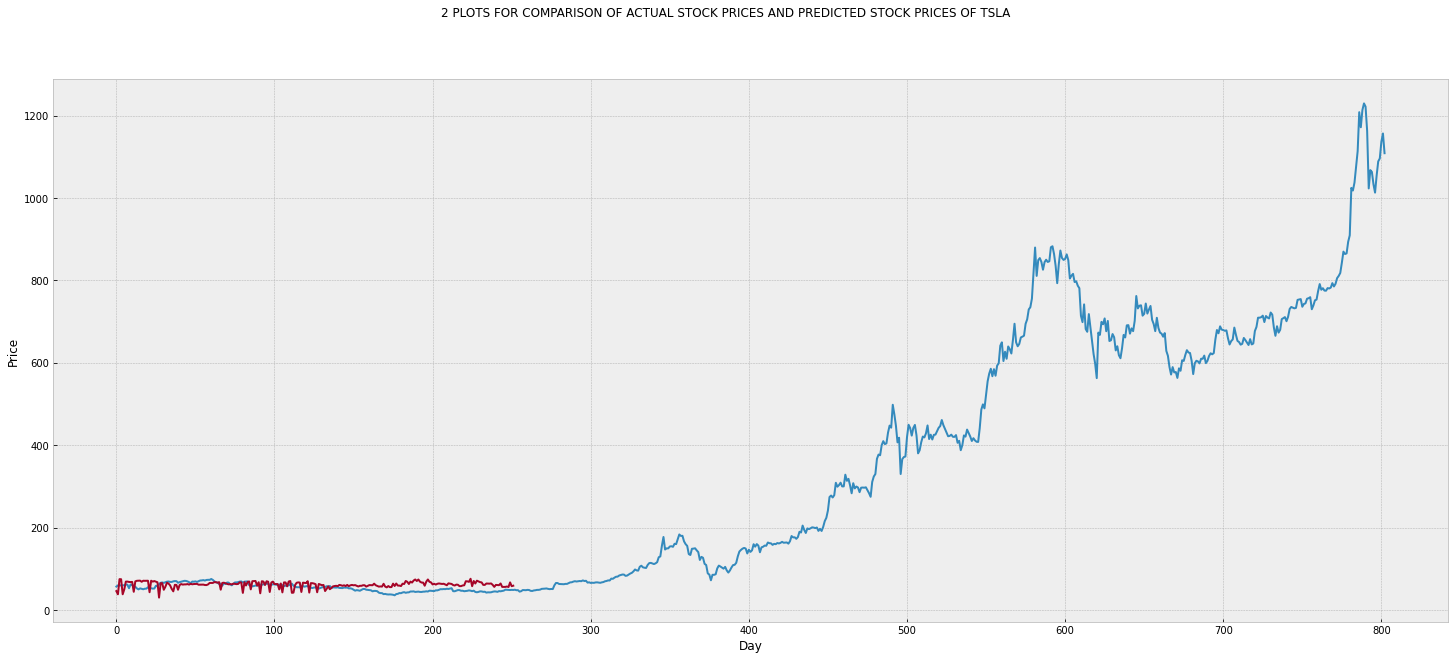

In [24]:
fig = plt.figure(figsize = (25, 10))
fig.suptitle('2 PLOTS FOR COMPARISON OF ACTUAL STOCK PRICES AND PREDICTED STOCK PRICES OF '+ticker+' ')
plt.plot(data1, label = 'Actual Stock Price of '+ticker+'')
plt.plot(prediction_values, label = 'Testing prediction')
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()